In [1]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import patches
from scipy import signal
import pyaudio
import wave
from pocketsphinx import LiveSpeech()

import cv2

Part C

In [24]:
chunk = 1024
sample_format = pyaudio.paInt16
channels = 1
fs = 44100
seconds = 0.5

p = pyaudio.PyAudio()

print("recording")

stream = p.open(format=sample_format, channels=channels, rate=fs, frames_per_buffer=chunk,input=True)

frames = []

for i in range(0, int(fs/chunk *seconds)):
    d = stream.read(chunk)
    for x in np.frombuffer(d, dtype=np.int16):
        frames.append(x)

stream.stop_stream()
stream.close()
p.terminate()

frames = np.array(frames)


recording


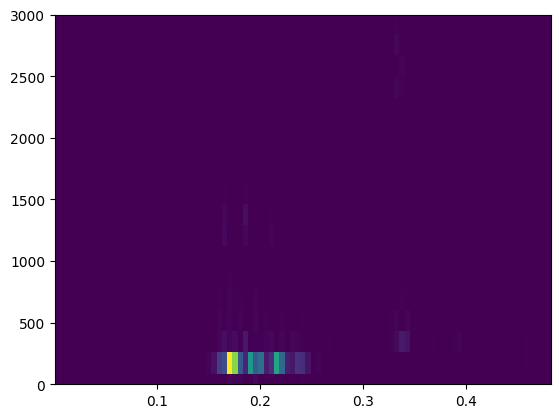

In [25]:
f, t, Sxx = signal.spectrogram(frames, fs)
plt.ylim(0, 3000)
plt.pcolormesh(t, f, Sxx)

In [29]:
from pocketsphinx import LiveSpeech
speech = LiveSpeech(keyphrase='forward', kws_threshold=1e-20)
# an for in loop to iterate in speech
for phrase in speech:
        # printing if the keyword is spoken with segments along side.
    print(phrase.segments(detailed=True))

#for phrase in LiveSpeech():
#        print(phrase)

what the load except for did not
we were in
go vote is for work and
the
or
if i get on and
this is such a good how forward
ha well a big dog a mutt
the
shh this is the arctic ocean this is garbage
up on it but and this is garbage
those who
those who are at is is that it is but but
it had rained hey it depends on what i mean doesn't mean that the river out with our lives
richard dunne
we huge
fuck
if i'd have to do a lot of people and
and
ah i thought that although today
he lowered perhaps
we've we've known as aware of the of the losers
if we you know i was aware of the new loses wow
it
if wow but
op

do a barrel roll
asked if i see it except beautifully that

yes there was a director and it sounds as korea
oh


it sounds especially if if if if that was it it again
and to

ah okay very aesthetic then get her on what



In [36]:

# Python program to translate
# speech to text and text to speech
 
 
import speech_recognition as sr
import pyttsx3 
 
# Initialize the recognizer 
r = sr.Recognizer() 
 
# Function to convert text to
# speech
def SpeakText(command):
     
    # Initialize the engine
    engine = pyttsx3.init()
    engine.say(command) 
    engine.runAndWait()
     
     
# Loop infinitely for user to
# speak
 
while(1):    
     
    # Exception handling to handle
    # exceptions at the runtime
    try:
         
        # use the microphone as source for input.
        with sr.Microphone() as source2:
             
            # wait for a second to let the recognizer
            # adjust the energy threshold based on
            # the surrounding noise level 
            r.adjust_for_ambient_noise(source2, duration=0.2)
             
            #listens for the user's input 
            audio2 = r.listen(source2)
            
            # Using google to recognize audio
            MyText = r.recognize_google(audio2)
            MyText = MyText.lower()
 
            print("Did you say ",MyText)
            SpeakText(MyText)
             
    except sr.RequestError as e:
        print("Could not request results; {0}".format(e))
         
    except sr.UnknownValueError:
        print("unknown error occurred")


    if "speak" in MyText:
        print("State->Speak")

    if "come" in MyText:
        print("State->Come")

    if "fetch" in MyText:
        print("State->Fetch")

unknown error occurred
Did you say  be louder speak
State->Speak
Did you say  all right finally got it to work woohoo hey google
Did you say  fetch
State->Fetch
Did you say  yes there was that's why he sent out here
Did you say  this is the this is the actual this is the camera if you want to look at the all the specs of the camera but like field of view the cameras 120 degrees so that's that's what he gave us i'm trying to solve that i'm sure if we
Did you say  we got the messages to do on all of the messages do you want to try to make the robots i can certainly try i guess we need to
unknown error occurred
Did you say  turn on voice commands we're going to have time to save the data right now
Did you say  yeah i mean we can always
Did you say  a little over a month but if we know slice out thanksgiving i mean we got the vote we got the sound


KeyboardInterrupt: 

Part D

In [26]:
camera = cv2.VideoCapture(0)
ret_val, image = camera.read()
del(camera)

image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

error: OpenCV(4.8.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


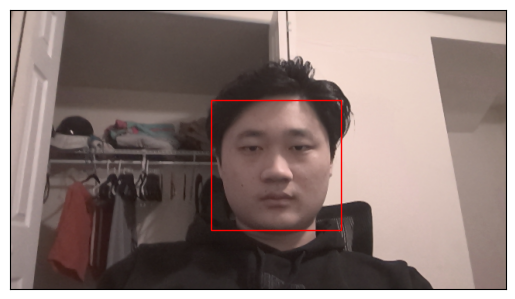

In [ ]:
haar_cascade = cv2.CascadeClassifier('Haarcascade_frontalface_default.xml')
faces = haar_cascade.detectMultiScale(image, 1.1, 9)
fig, ax = plt.subplots()
ax.imshow(image)
plt.xticks([]);
plt.yticks([]);
for (x, y, w, h) in faces:
    rect = patches.Rectangle((x, y), w, h, linewidth = 1, edgecolor = 'r', facecolor = 'none')
    ax.add_patch(rect)